<a href="https://colab.research.google.com/github/ashwinbjind/NLP/blob/main/VAC_Food_Competition_3006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Megenta Red'>**Import Required Libraries**</font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas          as pd
import numpy           as np
import seaborn         as snb
import matplotlib .pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LinearRegression
from sklearn.linear_model      import Lasso
from sklearn.neighbors         import KNeighborsRegressor
from sklearn.ensemble          import GradientBoostingRegressor
from sklearn.svm               import SVR
from sklearn.metrics           import r2_score


# <font color='Megenta Red'>**Data Upload**</font> 

In [4]:
train=pd.read_csv("/content/drive/MyDrive/DME - I/Food/Food_train/train.csv")
test=pd.read_csv("/content/drive/MyDrive/DME - I/Food/Food_test.csv")

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
meal_info=pd.read_csv("/content/drive/MyDrive/DME - I/Food/Food_train/meal_info.csv")
center_info=pd.read_csv("/content/drive/MyDrive/DME - I/Food/Food_train/fulfilment_center_info.csv")

# <font color='Megenta Red'>**Preprocessing**</font> 

In [11]:
print(train.columns)
print(train.shape)

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')
(456548, 9)


In [12]:
print(meal_info.columns)
print(meal_info.shape)

Index(['meal_id', 'category', 'cuisine'], dtype='object')
(51, 3)


In [13]:
print(center_info.columns)
print(center_info.shape)

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')
(77, 5)


In [14]:
train_meal_info = pd.merge(train, meal_info, on="meal_id", how="outer")
train_meal_info.shape

(456548, 11)

In [15]:
train_df=pd.merge(train_meal_info,center_info,on="center_id", how="outer")

In [16]:
train_df.head()
#print(train_df.shape)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [17]:
train_df.shape

(456548, 15)

In [18]:
train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [19]:
train_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [20]:
label_encoder = preprocessing.LabelEncoder()
train_df['center_type']= label_encoder.fit_transform(train_df['center_type'])
train_df['cuisine']= label_encoder.fit_transform(train_df['cuisine'])
train_df['category']= label_encoder.fit_transform(train_df['category'])
train_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                   int64
cuisine                    int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
dtype: object

# <font color='Megenta Red'>**Exploratory Data Analysis**</font> 

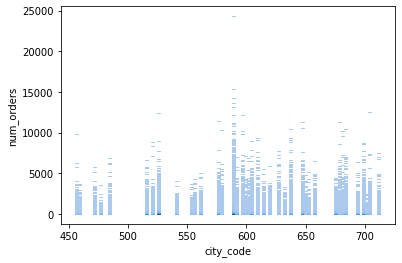

In [21]:
snb.histplot(x="city_code", y="num_orders",  data=train_df)

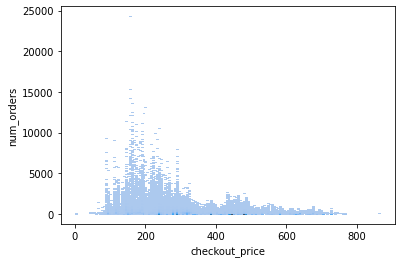

In [22]:
snb.histplot(x="checkout_price", y="num_orders",  data=train_df)

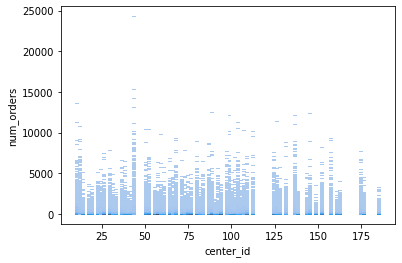

In [23]:
snb.histplot(x="center_id", y="num_orders",  data=train_df)

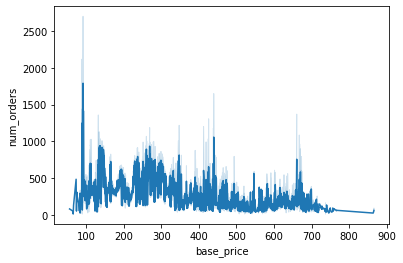

In [24]:
#snb.histplot(x="base_price", y="num_orders",  data=train_df)
snb.lineplot(x="base_price", y="num_orders",  data=train_df)
#snb.lineplot(data=df, x="Tag", y="Upvotes")

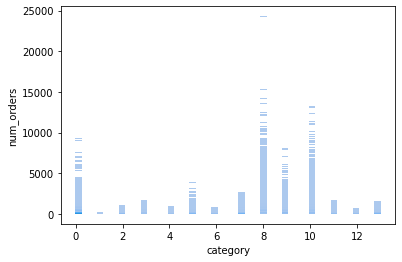

In [25]:
snb.histplot(x="category", y="num_orders",  data=train_df)

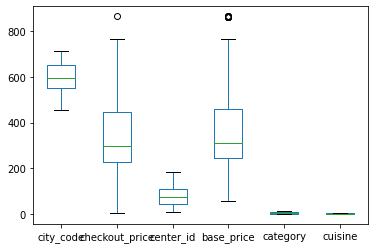

In [26]:
train_df.boxplot( column =["city_code","checkout_price","center_id","base_price","category" ,"cuisine" ], grid = False)

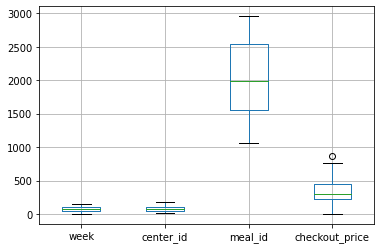

In [27]:
boxplot = train_df.boxplot(column=[ 'week', 'center_id', 'meal_id', 'checkout_price'])

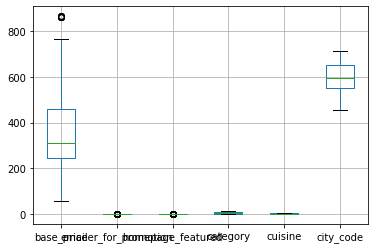

In [28]:
boxplot = train_df.boxplot(column=['base_price','emailer_for_promotion', 'homepage_featured', 'category','cuisine', 'city_code'])

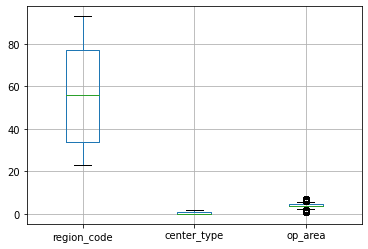

In [29]:
boxplot = train_df.boxplot(column=[ 'region_code', 'center_type', 'op_area'])

In [30]:
train_df.shape

(456548, 15)

# <font color='Megenta Red'>**Feature Engineering**</font> 

In [31]:
Q1 = train_df.quantile(0.2)
Q3 = train_df.quantile(0.8)
IQR = Q3 - Q1
train_df1 = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(train_df1)

             id  week  center_id  ...  region_code  center_type  op_area
0       1379560     1         55  ...           56            2      2.0
1       1018704     2         55  ...           56            2      2.0
2       1196273     3         55  ...           56            2      2.0
3       1116527     4         55  ...           56            2      2.0
4       1343872     5         55  ...           56            2      2.0
...         ...   ...        ...  ...          ...          ...      ...
456539  1166111   137         61  ...           77            0      4.5
456544  1060716   142         61  ...           77            0      4.5
456545  1029231   143         61  ...           77            0      4.5
456546  1141147   144         61  ...           77            0      4.5
456547  1443704   145         61  ...           77            0      4.5

[355246 rows x 15 columns]


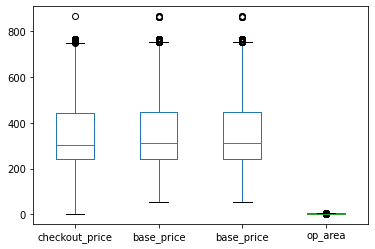

In [32]:
train_df1.boxplot( column =["checkout_price","base_price",'base_price','op_area'], grid = False)

In [33]:
X=train_df1.drop(["id","num_orders"],axis=1)
y=train_df1["num_orders"]
X.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [34]:

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

             Specs         Score
3   checkout_price  3.877214e+06
4       base_price  3.862622e+06
2          meal_id  1.273525e+05
1        center_id  2.389823e+04
8          cuisine  1.475759e+04
7         category  1.032418e+04
0             week  8.175901e+03
9        city_code  5.617817e+03
10     region_code  3.076108e+03
11     center_type  1.933509e+03


In [36]:
trainfinal2 = train_df1.drop(['id','num_orders'], axis=1)
correlation = train_df1.corr(method='pearson')
columns = correlation.nlargest(10,"num_orders").index
columns

Index(['num_orders', 'cuisine', 'op_area', 'category', 'region_code',
       'city_code', 'meal_id', 'id', 'week', 'center_id'],
      dtype='object')

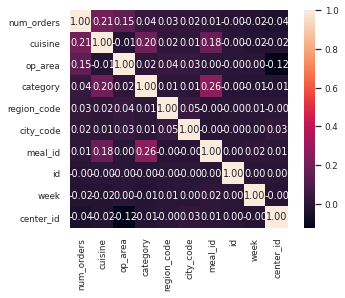

In [37]:
correlation_map = np.corrcoef(train_df1[columns].values.T)
snb.set(font_scale=0.8)
heatmap = snb.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

# <font color='Megenta Red'>**Build Model**</font>


In [38]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X1 = X.transpose()
# #y1 = y.transpose()
# X1 = sc_X.fit_transform(X)
# y1 = sc_y.fit_transform([y])
# y1 = y1.transpose() 
# y1.shape

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)


## **LinearRegression 19.99 %**

In [40]:
model=LinearRegression()
model.fit(X_train,y_train)#Training - In 
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

0.2001886724523081

## ** KNeighborsRegressor 79.12 % **



In [41]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_predict1=KNN.predict(X_test)
# y_predict1[y_predict1<0] = 0
r2_score(y_test,y_predict1)
# from sklearn import metrics
# print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

0.7938155701134837

In [42]:
y_predict1

array([475.2,  34.6,  33.2, ..., 348.6, 127.2, 685.8])

# XGBRegressor 61.45 %

In [43]:
from xgboost import XGBRegressor 
XG = XGBRegressor() 
XG.fit(X_train, y_train) 
y_pred2 = XG.predict(X_test)
r2_score(y_test,y_pred2) 
#y_pred2[y_pred<0] = 0 
# from sklearn import metrics 
# print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred2)))

[16:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6168575741843311

# Lasso 19.57 %

In [44]:
L = Lasso() 
L.fit(X_train, y_train) 
y_pred3 = L.predict(X_test)
r2_score(y_test,y_pred3)

0.19981510233807143

#Test data Prediction

### Create Pickle Model

In [69]:
test_meal_info = pd.merge(test, meal_info, on="meal_id", how="outer")
test_meal_info.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1460444,146,24,1885,158.11,160.11,0,1,Beverages,Thai
2,1098228,146,11,1885,158.17,157.17,0,0,Beverages,Thai
3,1316160,146,83,1885,142.59,143.59,0,0,Beverages,Thai
4,1390579,146,32,1885,122.28,121.28,0,0,Beverages,Thai


In [70]:
test_df=pd.merge(test_meal_info,center_info,on="center_id", how="outer")

In [71]:
test_df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [72]:
test_df=test_df.drop("id",axis=1)
test_df.shape

(32573, 13)

In [73]:
test_df['center_type']= label_encoder.fit_transform(test_df['center_type'])
test_df['cuisine']= label_encoder.fit_transform(test_df['cuisine'])
test_df['category']= label_encoder.fit_transform(test_df['category'])
#train_df.dtypes

In [74]:
X= test_df

In [75]:
print(X.shape)
X.head()

(32573, 13)


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,146,55,1885,158.11,159.11,0,0,0,3,647,56,2,2.0
1,147,55,1885,159.11,159.11,0,0,0,3,647,56,2,2.0
2,149,55,1885,157.14,158.14,0,0,0,3,647,56,2,2.0
3,150,55,1885,159.14,157.14,0,0,0,3,647,56,2,2.0
4,151,55,1885,160.11,159.11,0,0,0,3,647,56,2,2.0


In [78]:
pd.set_option('display.max_columns',None)
X.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,146,55,1885,158.11,159.11,0,0,0,3,647,56,2,2.0
1,147,55,1885,159.11,159.11,0,0,0,3,647,56,2,2.0
2,149,55,1885,157.14,158.14,0,0,0,3,647,56,2,2.0
3,150,55,1885,159.14,157.14,0,0,0,3,647,56,2,2.0
4,151,55,1885,160.11,159.11,0,0,0,3,647,56,2,2.0


###Prediction for Single row(data)

In [79]:
output= KNN.predict([[146,55,1885,158.11,159.11,0,0,0,3,647,56,2,2.0]])
output

array([127.2])

###Prediction for test dataset

In [80]:
pred = KNN.predict(X)
len(pred)

32573

In [81]:
pred[:20]

array([127.2, 127.2, 129.4, 129.4, 127.2, 127.2, 129.4, 129.4, 129.4,
       149. , 151.8, 127.4, 127.4, 127.4, 127.4, 151.8, 127.4, 151.8,
       151.8, 159.2])

In [82]:
test1= pd.DataFrame(pred)

In [83]:
test1.head()
print(test1.shape)

(32573, 1)


In [84]:
test1["num_orders"]= test1[0]

In [85]:
test1.head()

,0,num_orders
0,127.2,127.2
1,127.2,127.2
2,129.4,129.4
3,129.4,129.4
4,127.2,127.2


In [86]:
test1 = test1.drop(0,axis=1)

In [87]:
test1.head()

,num_orders
0,127.2
1,127.2
2,129.4
3,129.4
4,127.2


In [88]:
test1['id'] = test['id'] 
#test1.set_index('id')

In [89]:
test1.head()

,num_orders,id
0,127.2,1028232
1,127.2,1127204
2,129.4,1212707
3,129.4,1082698
4,127.2,1400926


In [90]:
Food_submission = test1[['id', 'num_orders']]
Food_submission.head()

,id,num_orders
0,1028232,127.2
1,1127204,127.2
2,1212707,129.4
3,1082698,129.4
4,1400926,127.2


In [94]:
Food_submission.to_csv('/content/Food_submission.csv')